In [1]:
import pandas as pd
from datetime import datetime
from pandas import DataFrame
from pandas import read_csv
#h=pd.read_csv("Clearness Index3.csv" )

#h1=h.drop([ 'insolation_clearness_index','temp','Min_temp','Claer_sky_ii','humidity','dew/frost_point','max_temp','wind_s','precipitation'], axis=1)
#h1.to_csv('All_sky_ii.csv',  index = None)
h1=pd.read_csv("All_sky_ii2.csv" )

number = 24
elements = 1127

thelist = [number] * elements
h1['thelist'] = thelist

Hour = ['01','02','03','04','05','06','07','08', '09','10','11','12','13','14','15','16','17','18','19','20','21','22','23','00']

elements = 1127

Hour = [Hour] * elements

my_new_list = []
for sub_list in Hour:
    # Now go over each item of the sublist
    for item in sub_list:
        # append it to our new list
        my_new_list.append(item)
        
        out =h1.reindex(h1.index.repeat(h1['thelist']))
h1=out.drop(['thelist'], axis=1)

h1['Hour'] = my_new_list
h1["DateTime"] = (h1["date"] +" "+ h1["Hour"])
h_data=h1.drop(['date','Hour'],axis=1)


h_data['DateTime'] = pd.to_datetime(h_data['DateTime'])

h_data=h_data.set_index(h_data['DateTime'], drop=False, append=False, inplace=False, verify_integrity=False).drop('DateTime', 1)
h_data.columns=['All_Sky_Insolation_Incident']

#h_data

In [2]:

d = pd.read_csv("load3.csv" )

d.columns = ['date' ,'01','02','03','04','05','06','07','08', '09','10','11','12','13','14','15','16','17','18','19','20','21','22','23','00']
d.to_csv('load3.csv',  index = None)

from pandas import DataFrame

# read first line
with open("load3.csv") as myfile:
    headRow = next(myfile)

# read column names    
columns = [x.strip() for x in headRow.split(',')]

# process by pandas
data = pd.read_csv("load3.csv", names=columns[1:], skiprows=1)

stacked=data.stack()

stacked = stacked.to_frame()
stacked.columns=['Load']
s=stacked.reset_index()
s.columns=['Date','Hour','Load']
s["DateTime"] = (s["Date"] +" "+ s["Hour"])
s = s[["DateTime","Load"]]
from datetime import datetime

s['DateTime'] = pd.to_datetime(s['DateTime'])
dataset=s.set_index(s['DateTime'], drop=False, append=False, inplace=False, verify_integrity=False).drop('DateTime', 1)
#dataset

In [3]:
df=pd.merge(dataset,h_data,on='DateTime')
df

,Load,All_Sky_Insolation_Incident
DateTime,,
1987-01-01 01:00:00,1733,0.68
1987-01-01 02:00:00,1636,0.68
1987-01-01 03:00:00,1564,0.68
1987-01-01 04:00:00,1526,0.68
1987-01-01 05:00:00,1515,0.68
...,...,...
1990-01-31 20:00:00,3361,3.88
1990-01-31 21:00:00,3205,3.88
1990-01-31 22:00:00,2940,3.88


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f94f2ac3350>,
      dtype=object)

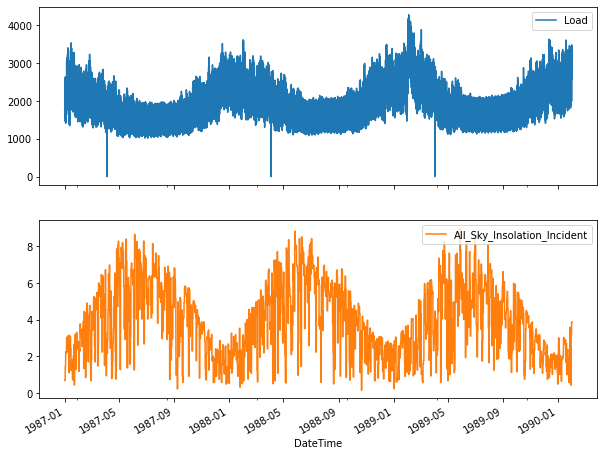

In [4]:
df.plot(subplots=True, figsize=(10,8))

In [5]:
import numpy as np

train_size = int(len(df) * 0.6)
test_size = len(df) - train_size
train, test = df.iloc[0:train_size], df.iloc[train_size:len(df)]
print(len(train), len(test))

test_size = int(len(test) * 0.5)
val_size = len(test) - test_size
val, test = test.iloc[0:test_size], test.iloc[test_size:len(test)]
print(len(test), len(val))

16228 10820
5410 5410


In [6]:
train,val,test

(                     Load  All_Sky_Insolation_Incident
 DateTime                                              
 1987-01-01 01:00:00  1733                         0.68
 1987-01-01 02:00:00  1636                         0.68
 1987-01-01 03:00:00  1564                         0.68
 1987-01-01 04:00:00  1526                         0.68
 1987-01-01 05:00:00  1515                         0.68
 ...                   ...                          ...
 1988-11-06 00:00:00  1707                         3.13
 1988-11-07 01:00:00  1552                         1.79
 1988-11-07 02:00:00  1514                         1.79
 1988-11-07 03:00:00  1499                         1.79
 1988-11-07 04:00:00  1531                         1.79
 
 [16228 rows x 2 columns],
                      Load  All_Sky_Insolation_Incident
 DateTime                                              
 1988-11-07 05:00:00  1620                         1.79
 1988-11-07 06:00:00  1947                         1.79
 1988-11-07 07:00:0

In [7]:
from sklearn.preprocessing import MinMaxScaler

f_columns = ['All_Sky_Insolation_Incident']

f_transformer = MinMaxScaler()
t_transformer = MinMaxScaler()

f_transformer = f_transformer.fit(train[f_columns].to_numpy())
t_transformer = t_transformer.fit(train[['Load']])

train.loc[:, f_columns] = f_transformer.transform(train[f_columns].to_numpy())
train['Load'] = t_transformer.transform(train[['Load']])

val.loc[:, f_columns] = f_transformer.transform(val[f_columns].to_numpy())
val['Load'] = t_transformer.transform(val[['Load']])


test.loc[:, f_columns] = f_transformer.transform(test[f_columns].to_numpy())
test['Load'] = t_transformer.transform(test[['Load']])

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1734: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value[:, i].tolist())
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':


In [8]:
def create_dataset(X, y, time_steps=1):
    Xs, ys = [], []
    for i in range(len(X) - time_steps):
        v = X.iloc[i:(i + time_steps)].values
        Xs.append(v)        
        ys.append(y.iloc[i + time_steps])
    return np.array(Xs), np.array(ys)



In [21]:
import numpy as np

time_steps = 24

# reshape to [samples, time_steps, n_features]

X_train, y_train = create_dataset(train, train.Load, time_steps)

X_validate, y_validate = create_dataset(val, val.Load, time_steps)

X_test, y_test = create_dataset(test, test.Load, time_steps)


print(X_train.shape, y_train.shape,X_validate.shape, y_validate.shape,X_test.shape, y_test.shape)

(16204, 24, 2) (16204,) (5386, 24, 2) (5386,) (5386, 24, 2) (5386,)


In [10]:
!pip install keras_tuner

     |████████████████████████████████| 98 kB 1.6 MB/s 


In [11]:
import pandas as pd
import math
import keras
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import save_model
from tensorflow.keras.models import model_from_json
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dropout
import keras_tuner
#from kerastuner.tuners import RandomSearch
#from kerastuner.engine.hyperparameters import HyperParameters
from pickle import dump,load
from keras_tuner import RandomSearch
from keras_tuner import HyperModel
from keras_tuner import HyperParameters
import warnings
warnings.simplefilter("ignore", UserWarning)
from tensorflow.keras import layers


In [14]:
import tensorflow as tf
def build_model(hp):
    model = keras.Sequential()
    model.add(LSTM(4, input_shape=(X_train.shape[1], X_train.shape[2])))
        
    model.add(layers.Dense(1))
    model.compile(
        optimizer=tf.keras.optimizers.Adam( ),
        loss='mean_squared_error',
        metrics=['mse'])
    return model


In [22]:
class RandomSearch(keras_tuner.tuners.BayesianOptimization):

  def run_trial(self, trial, *args, **kwargs):
    # You can add additional HyperParameters for preprocessing and custom training loops
    # via overriding `run_trial`
    kwargs['batch_size'] = trial.hyperparameters.Int('batch_size', 32, 256, step=32)
    #kwargs['epochs'] = trial.hyperparameters.Int('epochs', 50, 200)
    return super(RandomSearch, self).run_trial(trial, *args, **kwargs)

In [23]:
tuner = RandomSearch(
    build_model,
    objective='val_mse',
    max_trials=10,
    executions_per_trial=1,
    overwrite=True
)

In [24]:
from tensorflow.keras.callbacks import EarlyStopping

custom_early_stopping = EarlyStopping(
    monitor='val_loss', 
    patience=5, 
    min_delta=0.001, 
    mode='auto'
)

In [25]:
tuner.search(
        x=X_train,
        y= y_train,
        epochs=50,
        validation_data=(X_validate, y_validate),
        callbacks=[custom_early_stopping]
)

Trial 10 Complete [00h 01m 30s]
val_mse: 0.0009540786268189549

Best val_mse So Far: 0.0007269307388924062
Total elapsed time: 00h 18m 17s
INFO:tensorflow:Oracle triggered exit


In [26]:
tuner.results_summary()

Results summary
Results in ./untitled_project
Showing 10 best trials
Objective(name='val_mse', direction='min')
Trial summary
Hyperparameters:
batch_size: 32
Score: 0.0007269307388924062
Trial summary
Hyperparameters:
batch_size: 32
Score: 0.0007339496514759958
Trial summary
Hyperparameters:
batch_size: 32
Score: 0.0007427138043567538
Trial summary
Hyperparameters:
batch_size: 32
Score: 0.0007772369426675141
Trial summary
Hyperparameters:
batch_size: 32
Score: 0.0008572954684495926
Trial summary
Hyperparameters:
batch_size: 32
Score: 0.0009540786268189549
Trial summary
Hyperparameters:
batch_size: 32
Score: 0.0009753238409757614
Trial summary
Hyperparameters:
batch_size: 32
Score: 0.000982750323601067
Trial summary
Hyperparameters:
batch_size: 32
Score: 0.0010018768953159451
Trial summary
Hyperparameters:
batch_size: 160
Score: 0.002230278681963682


In [20]:
tuner.results_summary()

Results summary
Results in ./untitled_project
Showing 10 best trials
Objective(name='val_mse', direction='min')
Trial summary
Hyperparameters:
batch_size: 32
epochs: 50
Score: 0.0007055290625430644
Trial summary
Hyperparameters:
batch_size: 32
epochs: 50
Score: 0.0008035730570554733
Trial summary
Hyperparameters:
batch_size: 32
epochs: 50
Score: 0.0008353606099262834
Trial summary
Hyperparameters:
batch_size: 32
epochs: 97
Score: 0.0008894151542335749
Trial summary
Hyperparameters:
batch_size: 32
epochs: 50
Score: 0.0009202974615618587
Trial summary
Hyperparameters:
batch_size: 32
epochs: 67
Score: 0.0010187029838562012
Trial summary
Hyperparameters:
batch_size: 32
epochs: 136
Score: 0.0011484116548672318
Trial summary
Hyperparameters:
batch_size: 32
epochs: 200
Score: 0.0014552343636751175
Trial summary
Hyperparameters:
batch_size: 128
epochs: 50
Score: 0.0014725662767887115
Trial summary
Hyperparameters:
batch_size: 256
epochs: 157
Score: 0.002336764708161354
